(60000, 28, 28)
(10000, 28, 28)


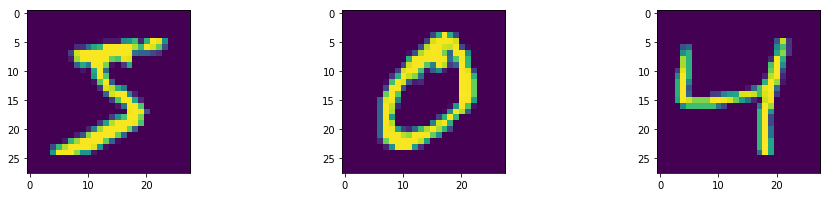

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
[5 0 4 1 9 2 1 3 1 4]
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.7762 - acc: 0.8270 - val_loss: 0.3158 - val_acc: 0.9181
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2678 - acc: 0.9245 - val_loss: 0.2200 - val_acc: 0.9383
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1988 - acc: 0.9427 - val_loss: 0.1762 - val_acc: 0.9484
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1587 - acc: 0.9539 - val_loss: 0.1487 - val_acc: 0.9562
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1308 - acc: 0.9618 - val_loss: 0.1282 - val_acc: 0.9637
Epoch 6/10


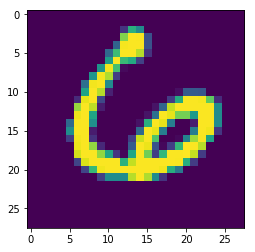

This is actually a 6

[[4.9623002e-05 2.4774356e-06 3.7593723e-05 2.4242105e-08 5.7744968e-05
  9.8872852e-06 9.9983644e-01 1.5942787e-08 6.0903221e-06 6.8578387e-08]]

99.98364448547363 % chance of this being a 6


In [3]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)


import matplotlib.pyplot as plt

f,ax = plt.subplots(1,3, figsize=(16,3))
ax[0].imshow(X_train[0])
ax[1].imshow(X_train[1])
ax[2].imshow(X_train[2])
plt.show()


from sklearn.preprocessing import LabelBinarizer

# all inputs are defined as vectors, i.e. we collapse a 28x28 image to a 784 feature vector
# all inputs should be scaled to the range [0,1] (images are in the range [0,255])
X  = X_train.reshape(60000,784) / 255
Xt = X_test.reshape( 10000,784) / 255

# all outputs are defined as categorical values. We do a one-hot encoding of these
categorical_transform = LabelBinarizer().fit(np.arange(10)) # labels are in the range [0,10]
y  = categorical_transform.transform(y_train)
yt = categorical_transform.transform(y_test)

print(y[:10,:])
print(y_train[:10])


from keras.models import Sequential
from keras.layers import Dense

# create a model of sequential layers 
model = Sequential()

# add the first layer, this *requires* you to specify the input dimension (our 28*28=784 px images)
model.add(Dense(input_dim=784, units = 100, activation='sigmoid'))

# add the second layer. All layers require you to specify the number of neurons (units)
model.add(Dense(               units =  49, activation='sigmoid'))

# the third and final output layer. We here use the 'softmax' activation function since we want to classify
# the numbers [0-9] with a percentage prediction
model.add(Dense(               units =  10, activation='softmax'))

# finish the model and compile it so it is ready for training
model.compile(optimizer= 'adam',                     
              loss     = 'categorical_crossentropy',
              metrics  = ['accuracy'])


model.fit(X, y,
         epochs=10,
         batch_size=100,
         validation_data=(Xt,yt))

i = 201 # choose one test image index

# show one of the test images
plt.imshow(X_test[i,:,:])
plt.show()
print('This is actually a', y_test[i]) # this is what it is *supposed* to be
print()

# do a prediction using our model
prediction = model.predict(X_test[i,:,:].reshape(1,28*28)) # remember to roll the image data into a vector


# the prediction is a vector of 10 (output nodes) with % probability of that being the shown digit (softmax function)
print(prediction)
print()
print('{} % chance of this being a {}'.format(prediction[0,y_test[i]]*100, y_test[i]))